<a href="https://colab.research.google.com/github/HerasAy/Yapay-Zeka-Ai-/blob/main/Katman3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------
#KATMAN 3: YAPAY SİNİR AĞLARI (ANN)
-----------------------
Bu katman, klasik ML algoritmalarından (Scikit-Learn) modern Derin Öğrenme kütüphanelerine (TensorFlow/Keras) geçiş köprüsüdür.

##📚 Müfredat Planı
1. Giriş: Biyolojik Nöron vs Yapay Nöron. Tarihçe ve Perceptron'un Doğuşu.

2. Perceptron Mantığı: Tek Katmanlı Ağlar ve Mantık Kapıları (AND, OR, XOR Problemi).

3. Matematiksel Temel: Ağırlıklar (Weights), Sapma (Bias) ve Net Girdi.

4. Aktivasyon Fonksiyonları 1: Neden Doğrusallığı Kırmalıyız? Sigmoid ve Tanh.

5. Aktivasyon Fonksiyonları 2: Modern Kahramanlar: ReLU, Leaky ReLU ve Softmax.

6. Çok Katmanlı Algılayıcılar (MLP): Gizli Katmanlar (Hidden Layers) ve Derinlik.

7. İleri Yayılım (Forward Propagation): Verinin ağ içindeki yolculuğu.

8. Yitim Fonksiyonları (Loss Functions): Hata nasıl ölçülür? (MSE vs Cross-Entropy).

9. Optimizasyonun Kalbi: Gradyan İnişi (Gradient Descent) Mantığı.

10. Geri Yayılım (Backpropagation) 1: Hatanın geriye doğru dağıtılması (Zincir Kuralı).

11. Geri Yayılım (Backpropagation) 2: Matematiğin Python ile "Sıfırdan" Kodlanması.

12. TensorFlow ve Keras'a Giriş: İlk modern sinir ağımızı kuruyoruz.

13. Stokastik Gradyan İnişi (SGD) vs Batch: Öğrenme stratejileri.

14. Aşırı Öğrenme (Overfitting) ile Savaş 1: Dropout Katmanı.

15. Aşırı Öğrenme ile Savaş 2: Erken Durdurma (Early Stopping) ve L1/L2 Regularization.

16. Hiperparametreler: Epoch, Batch Size ve Learning Rate Ayarı.

17. Modern Optimizasyoncular: Momentum, RMSProp ve Adam Optimizer.

18. Ağırlaştırma (Initialization): Xavier ve He Başlatma Yöntemleri.

19. Batch Normalization: Eğitimi hızlandırma ve stabilize etme sanatı.

20. Capstone Projesi: MNIST Veri Seti ile El Yazısı Rakam Tanıma (Yüzde 99 Başarı).

------------------
#1- Giriş: Biyolojik Nöron vs Yapay Nöron. Tarihçe ve Perceptron'un Doğuşu
-------------------
İnsan beyni, yaklaşık 86 milyar nörondan oluşan ve sadece 20 Watt (bir ampul kadar) enerji harcayarak süper bilgisayarların yapamadığı işleri (şiir yazmak, espriyi anlamak, yüz tanımak) yapabilen muazzam bir makinedir.

Bilim insanları 1950'lerde şu soruyu sordu: "Bilgisayarları işlemci mantığıyla değil de, beyin mantığıyla tasarlarsak ne olur?"

İşte ***Yapay Sinir Ağları (ANN)*** bu sorunun cevabıdır. Amacımız beynin biyolojik yapısını matematiksel formüllere dökmektir.

## Biyoloji vs Matematik
Bir biyolojik nöronun yapısı ile yapay nöron arasındaki benzerlik şaşırtıcıdır:

| Biyolojik Yapı | Görevi | Yapay Nörondaki Karşılığı |
|----------------|--------|--------------------------|
| Dendrit | Sinyalleri (girdileri) toplar | Girdi Verisi (x) |
| Sinaps | Sinyalin gücünü belirler | Ağırlıklar (w) |
| Soma (Hücre Gövdesi) | Sinyalleri toplar | Toplama Fonksiyonu (∑) |
| Akson | Sinyali iletir | Çıktı (y) |
| Eşik Değeri | Ateşleme yapılıp yapılmayacağı | Aktivasyon Fonksiyonu (f) |



##Matematiksel Teori: Yapay Nöron Modeli

Bir yapay nöron (Node), gelen verileri alır, önem derecelerine (ağırlıklarına) göre çarpar, toplar ve bir karar verir.

Matematiksel formülü şudur:

$$y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)$$

Veya vektör formatında (daha havalı hali):

$$y = f(W^T X + b)$$

Burada:
* **$x$ (Inputs):** Girdiler (Örn: Piksel değeri, ev metrekaresi).
* **$w$ (Weights):** Ağırlıklar. Nöronun "öğrendiği" bilgiler buradadır.
* **$b$ (Bias):** Sapma değeri. Aktivasyon eşiğini kaydırmaya yarar.
* **$f$ (Activation Function):** Karar mekanizması (Örn: 0.5'ten büyükse 1 yap).

## Python Uygulaması: Tek Bir Nöron Kodlamak

Henüz TensorFlow gibi kütüphanelere girmiyoruz. Önce işin mutfağını, "saf Python" ile görelim. Basit bir nöron sınıfı yazacağız.

In [1]:
import numpy as np

class ArtificialNeuron:
    def __init__(self, n_inputs):
        # Ağırlıkları rastgele, Bias'ı sıfır başlat
        # n_inputs: Girdi sayısı (Örn: 3 tane x değeri varsa 3 ağırlık lazım)
        self.weights = np.random.randn(n_inputs)
        self.bias = 0

    def activation_function(self, z):
        # Basit Basamak Fonksiyonu (Step Function)
        # Girdi pozitifse 1, negatifse 0 döndür
        return 1 if z >= 0 else 0

    def forward(self, inputs):
        """
        İleri Yayılım: Girdiyi al, ağırlıkla çarp, bias ekle, fonksiyondan geçir.
        Formül: y = f(w*x + b)
        """
        # Dot Product (Nokta Çarpımı): w1*x1 + w2*x2 ...
        z = np.dot(inputs, self.weights) + self.bias

        # Karar ver
        output = self.activation_function(z)
        return output

# --- Senaryo: Ateşleme Testi ---
# Diyelim ki 3 girdimiz var: [Hava Sıcaklığı, Nem, Rüzgar]
# Nöron karar verecek: "Dışarı çıkalım mı?" (1: Evet, 0: Hayır)

neuron = ArtificialNeuron(n_inputs=3)

# Nöronun rastgele atanan ağırlıklarına bakalım
print(f"Başlangıç Ağırlıkları: {neuron.weights}")
print(f"Başlangıç Bias: {neuron.bias}")

# Örnek Girdi: [Sıcak(1), Nemli(0.8), Rüzgarlı(-0.5)] (Normalize edilmiş)
x = np.array([1.0, 0.8, -0.5])

decision = neuron.forward(x)
print(f"\nNöronun Kararı: {decision}")

# Manuel Müdahale (Eğitimi simüle edelim)
# Diyelim ki ağırlıkları biz elle ayarladık (Sıcaklık önemli, rüzgar önemsiz olsun)
neuron.weights = np.array([10.0, -2.0, 0.1])
# Sıcaklık(10) pozitif etki, Nem(-2) negatif etki yapıyor.

decision_new = neuron.forward(x)
print(f"Güncellenmiş Ağırlıklarla Karar: {decision_new}")

Başlangıç Ağırlıkları: [-0.5059446  -0.52848122  0.35836323]
Başlangıç Bias: 0

Nöronun Kararı: 0
Güncellenmiş Ağırlıklarla Karar: 1


###Kod Analizi

Bu basit kod parçası, ChatGPT'nin veya Google Translate'in temelindeki milyarlarca işlemden sadece bir tanesidir.

* <mark>forward</mark> fonksiyonu nöronun "düşünme" anıdır.

* <mark>weights</mark> dizisi nöronun "hafızasıdır". Öğrenme dediğimiz şey, bu ağırlık sayılarını (10.0, -2.0 gibi) doğru ayarlamaktan ibarettir.

##Tarihsel Not: Yapay Zekânın Kışı (AI Winter)
1957'de Frank Rosenblatt Perceptron'u icat ettiğinde, New York Times "Kendi kendine düşünen makine!" diye manşet atmıştı. Herkes heyecanlıydı. Ancak 1969'da Minsky ve Papert adlı iki bilim insanı, bu tek nöronun XOR problemini (basit bir mantık sorusu) çözemediğini matematiksel olarak kanıtladı. Bu hayal kırıklığı fonların kesilmesine ve 1. Yapay Zekâ Kışı'nın başlamasına neden oldu. Ta ki "Çok Katmanlı" yapıların gücü keşfedilene kadar...




----------------
# 2- Perceptron Mantığı: Tek Katmanlı Ağlar ve Mantık Kapıları (AND, OR, XOR Problemi).
-----------------

##Bilgisayarın Dili 0 ve 1

Bilgisayarların temeli transistörlerdir ve transistörler basit mantık kapılarını (Logic Gates) oluşturur.
* **VE (AND) Kapısı:** İki giriş de 1 ise sonuç 1'dir. (Hem anahtar A hem B açıksa lamba yanar).
* **VEYA (OR) Kapısı:** En az biri 1 ise sonuç 1'dir.

Frank Rosenblatt, ***Perceptron'u*** icat ettiğinde şunu iddia etti: "Bu model, insan beyni gibi öğrenebilir." Bunu kanıtlamak için Perceptron'un bu mantık kapılarını öğrenip öğrenemeyeceğine bakıldı.

##Matematiksel Teori: Doğrusal Ayrılabilirlik

Perceptron, uzaya düz bir çizgi (2 boyutta) veya düzlem (3 boyutta) çizer.

* Eğer problemin cevabı (Evet/Hayır noktaları), düz bir çizgiyle karpuz gibi ikiye ayrılabiliyorsa, Perceptron bunu çözer. Buna Doğrusal Olarak Ayrılabilir (Linearly Separable) problemler denir.

$$y = w_1 x_1 + w_2 x_2 + b$$


Bu denklem, koordinat sisteminde bir doğru belirtir. Doğrunun bir tarafı "0", diğer tarafı "1" sınıfıdır.

##Python Uygulaması: AND ve OR Kapısını Kodlamak

Kendi Perceptron sınıfımızı yazarak mantık kapılarını çözüp çözemediğini test edelim.

AND Kapısı Ağırlıkları: [-0.2  0.2  0.1]
AND(1, 1) = 1
AND(0, 1) = 0


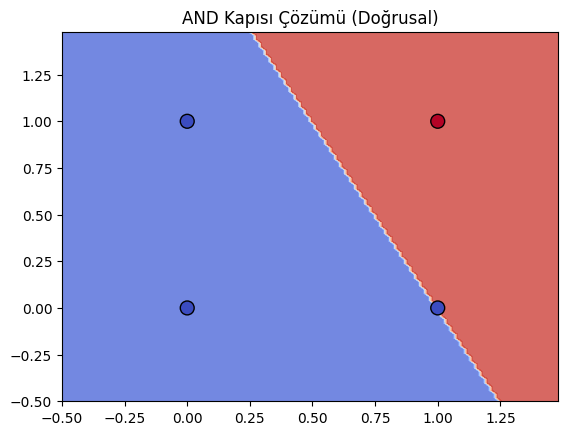

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1) # +1 Bias için
        self.lr = learning_rate
        self.epochs = epochs

    def predict(self, x):
        # x'in başına 1 ekle (Bias terimi için)
        x = np.insert(x, 0, 1)
        z = np.dot(x, self.weights)
        return 1 if z >= 0 else 0

    def train(self, X, y):
        # Basit Perceptron Öğrenme Kuralı
        for _ in range(self.epochs):
            for i in range(len(y)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                # Ağırlık Güncellemesi: w = w + lr * error * x
                self.weights[1:] += self.lr * error * X[i]
                self.weights[0]  += self.lr * error * 1 # Bias güncellemesi

# --- Veri Setleri (Mantık Kapıları) ---
X = np.array([[0,0], [0,1], [1,0], [1,1]])

y_and = np.array([0, 0, 0, 1]) # Sadece (1,1) -> 1
y_or  = np.array([0, 1, 1, 1]) # (0,0) hariç hepsi -> 1
y_xor = np.array([0, 1, 1, 0]) # Farklıysa 1, aynıysa 0 (KRİTİK!)

# --- Test: AND Kapısı ---
p_and = Perceptron(input_size=2)
p_and.train(X, y_and)
print("AND Kapısı Ağırlıkları:", p_and.weights)
# Test edelim
print(f"AND(1, 1) = {p_and.predict([1, 1])}") # Beklenen: 1
print(f"AND(0, 1) = {p_and.predict([0, 1])}") # Beklenen: 0

# --- Görselleştirme Fonksiyonu ---
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = np.array([model.predict(np.array([val1, val2])) for val1, val2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=100, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

plot_decision_boundary(X, y_and, p_and, "AND Kapısı Çözümü (Doğrusal)")

###Kod Analizi
Kodu çalıştırdığınızda, AND kapısı için mavi ve kırmızı bölgeleri ayıran düz bir çizgi göreceksiniz. Perceptron bunu başarıyla öğrenmiştir.

## Büyük Çöküş: XOR Problemi
Şimdi aynı kodu <mark>y_xor</mark> (XOR Kapısı) için çalıştırın.

Girdiler: (0,0)->0, (1,1)->0, (0,1)->1, (1,0)->1.

Çapraz şekilde duran bu noktaları tek bir düz çizgiyle ayırmayı deneyin. Kağıt üzerinde de deneyebilirsiniz. İmkansızdır. Perceptron modeli XOR problemini asla çözemez (Sonsuz döngüye girer veya hata yapar).

Minsky ve Papert bunu 1969'da kanıtladığında, "Bu yöntem çıkmaz sokak, mantık kapısını bile çözemiyor, insan beynini nasıl taklit edecek?" denildi ve fonlar kesildi. Çözüm ancak yıllar sonra ***"Gizli Katmanlar"*** (Hidden Layers) ile bulundu. İki doğru çizerseniz XOR'u çözebilirsiniz!

---------------
# 3- Matematiksel Temel: Ağırlıklar (Weights), Sapma (Bias) ve Net Girdi.
------------
##Giriş: Kara Kutuyu Açmak

Yapay sinir ağlarında eğitim bittiğinde elimizde binlerce <mark>w</mark> (Weight) ve <mark>b</mark> (Bias) sayısı kalır. Peki bu sayılar ne anlama gelir? Nöronun içinde neler döner?

Bu yazıda, soyut matematiksel kavramları geometrik olarak görselleştireceğiz.

##Ağırlık ($w$): Sinyalin Önem Derecesi

Nöronun formülü: $y = w \cdot x + b$.Bu aslında bir doğru denklemidir ($y = mx + c$).

* Burada $w$ (Eğim/Slope), girdinin ($x$) çıktı üzerinde ne kadar etkili olduğunu belirler.

**Görsel Analoji:**

* $w$ değerini değiştirmek, karar doğrusunun açısını (yönünü) değiştirir (döndürür).

* $w$ yüksekse: Girdi çok önemlidir. Doğru dikleşir.

* $w$ negatifse: Girdi ters etki yapar (Negatif korelasyon).

##Bias ($b$): Aktivasyon Eşiği

Bias, doğrunun orijinden (0,0) geçme zorunluluğunu kaldırır.

* $b$ değerini değiştirmek, karar doğrusunu **sağa, sola, yukarı veya aşağı kaydırır (Shift)**.

* Bias olmadan nöron, $x=0$ olduğunda her zaman $0$ üretmek zorunda kalırdı. Bu da esnekliği öldürürdü.


## Python Uygulaması: W ve B'nin Dansı

Matplotlib kullanarak interaktif olmasa da, farklı W ve B değerlerinin karar sınırını nasıl değiştirdiğini statik olarak çizelim.

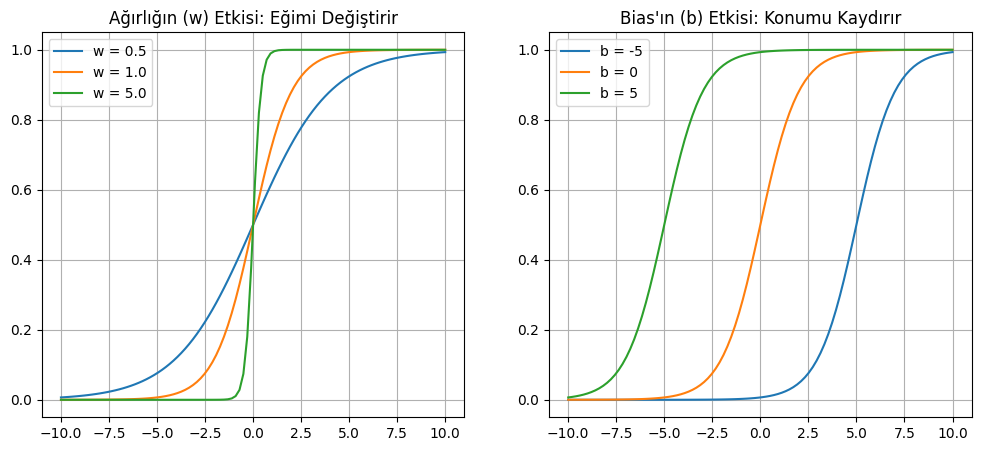

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 5))

# --- 1. Ağırlığın (w) Etkisi ---
plt.subplot(1, 2, 1)
weights = [0.5, 1.0, 5.0]
bias = 0
for w in weights:
    y = sigmoid(w * x + bias)
    plt.plot(x, y, label=f'w = {w}')
plt.title("Ağırlığın (w) Etkisi: Eğimi Değiştirir")
plt.legend()
plt.grid(True)

# --- 2. Bias'ın (b) Etkisi ---
plt.subplot(1, 2, 2)
weight = 1.0
biases = [-5, 0, 5]
for b in biases:
    y = sigmoid(weight * x + b)
    plt.plot(x, y, label=f'b = {b}')
plt.title("Bias'ın (b) Etkisi: Konumu Kaydırır")
plt.legend()
plt.grid(True)

plt.show()

##Grafik Yorumu

1. **Sol Grafik ($w$):** <mark>w</mark> arttıkça Sigmoid eğrisi (S harfi) dikleşir. <mark>w=5</mark> olduğunda neredeyse bir basamak fonksiyonu gibi sert bir geçiş olur. Yani nöron "çok emin" karar verir. <mark>w=0.5</mark> ise daha yumuşak, kararsız bir geçiştir.

2. **Sağ Grafik ($b$):** <mark>b</mark> değiştikçe S harfinin şekli bozulmaz, sadece sağa veya sola kayar. Bu, nöronun "Ne zaman ateşleme yapacağım?" eşiğini belirlemesidir. <mark>b=-5</mark> ise, ateşleme yapmak için çok güçlü bir <mark>x</mark> girdisi gerekir (Nöron zor tetiklenir).

##Sonuç: Öğrenme Nedir?

Yapay sinir ağlarında "öğrenme" (training) dediğimiz süreç, hatayı en aza indiren o *mükemmel $w$ ve $b$ kombinasyonunu* bulmaktan ibarettir.Milyonlarca parametreli bir modelde (GPT-4 gibi), bu sadece çok yüksek boyutlu bir uzayda en iyi $w$ ve $b$ değerlerini aramaktır.

----------------
# 4- Aktivasyon Fonksiyonları 1: Neden Doğrusallığı Kırmalıyız? Sigmoid ve Tanh.
-----------------

##Giriş: Neden Sadece Çarpıp Toplamıyoruz?

Bir nöronun işlemi şuydu: $z = w \cdot x + b$.Eğer bu $z$ değerini hiçbir işlemden geçirmeden bir sonraki nörona yollarsak ne olur?

* Katman 1: Doğrusal işlem.
* Katman 2: Doğrusal işlemin üzerine doğrusal işlem.
* Sonuç: Yine doğrusal işlem.


Matematiksel olarak, aktivasyon fonksiyonu kullanmayan bir "Derin Sinir Ağı", tek katmanlı bir ağ ile aynı güce sahiptir. Karmaşık eğrileri, yüzleri veya ses dalgalarını modelleyebilmek için araya *doğrusal olmayan (non-linear)* bir bükücü koymamız gerekir. İşte bu, aktivasyon fonksiyonudur.

##Klasik Kahramanlar: Sigmoid ve Tanh

Derin öğrenmenin ilk yıllarında kullanılan iki temel fonksiyonu inceleyelim.

###A. Sigmoid (Lojistik) Fonksiyonu

Girdiyi **(0, 1)** aralığına sıkıştırır. Olasılık tabanlı çıktılarda (Evet/Hayır) kullanılır.

$$f(x) = \frac{1}{1 + e^{-x}}$$

* ***Avantaj:*** Türevi alınabilir (öğrenme için şarttır). Sonuç her zaman pozitiftir.
* **Dezavantaj (Vanishing Gradient):** Çok büyük veya çok küçük sayılarda türev neredeyse 0 olur. Bu da öğrenmeyi durdurur (Gradient Vanishing Problemi).

###B. Tanh (Hiperbolik Tanjant) Fonksiyonu

Sigmoid'e benzer ama girdiyi **(-1, 1)** aralığına sıkıştırır.

$$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

* **Avantaj:** Çıktısı 0 merkezlidir (Zero-centered). Bu, optimizasyonun daha kolay olmasını sağlar. Genellikle gizli katmanlarda Sigmoid'den daha iyi performans gösterir.
* **Dezavantaj:** Sigmoid gibi bu da uç noktalarda öğrenmeyi durdurur (Doygunluk sorunu).

## Python Uygulaması: Fonksiyonları Çizmek

Bu fonksiyonların neye benzediğini ve türevlerinin (öğrenme kapasitesinin) nerelerde tıkandığını görelim.

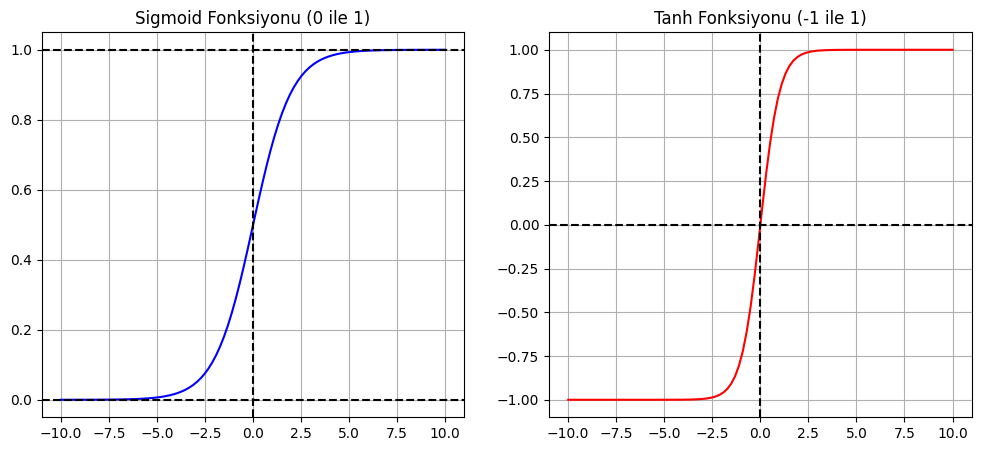

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fonksiyon Tanımları
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# X değerleri (-10 ile 10 arası)
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 5))

# --- Sigmoid Grafiği ---
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x), 'b', label='Sigmoid')
plt.title("Sigmoid Fonksiyonu (0 ile 1)")
plt.grid(True)
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# --- Tanh Grafiği ---
plt.subplot(1, 2, 2)
plt.plot(x, tanh(x), 'r', label='Tanh')
plt.title("Tanh Fonksiyonu (-1 ile 1)")
plt.grid(True)
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')

plt.show()

###Grafik Analizi
Grafiklere baktığınızda, x değeri 5'ten büyük veya -5'ten küçük olduğunda eğrinin dümdüz olduğunu (yataylaştığını) görürsünüz. Yatay çizginin eğimi (türevi) sıfırdır. Türev sıfırsa, nöron "öğrenmeyi bırakır". İşte eski ağların derinleşememesinin sebebi buydu.

----------------
# 5- Aktivasyon Fonksiyonları 2: Modern Kahramanlar: ReLU, Leaky ReLU ve Softmax.
----------------

## Giriş: Basitliğin Zaferi

Sigmoid ve Tanh'ın "türev kaybolması" (vanishing gradient) sorunu, derin öğrenmeyi yıllarca kısıtladı. Çözüm ise şaşırtıcı derecede basit bir fonksiyondan geldi: ReLU.

Bugün kullandığımız hemen hemen tüm derin ağlar (CNN, Transformers vb.) ReLU ve türevlerini kullanır.


## Modern Fonksiyonlar

**A. ReLU (Rectified Linear Unit)**

Formülü ilkokul matematiği kadar basittir: Negatifse 0 yap, pozitifse aynen kalsın.

$$f(x) = max(0, x)$$

* ***Avantaj:***

    1. Hesaplama Hızı: Üstel işlem ($e^x$) yoktur, sadece karşılaştırma vardır. Çok hızlıdır.
    2. Öğrenme: Pozitif tarafta türev daima 1'dir. Asla sönümlenmez (Vanishing gradient çözüldü!).
* ***Dezavantaj (Dead ReLU):*** Eğer bir nöron negatif bölgeye düşerse çıktısı 0 olur ve bir daha asla uyanamayabilir (Ölü nöron).

**B. Leaky ReLU**

Ölü nöron sorununu çözmek için negatif tarafa çok küçük bir eğim verilir.

$$f(x) = max(0.01x, x)$$

Böylece negatif değerler de tamamen yok edilmez, "sızdırılır".

**C. Softmax (Çıktı Katmanının Kralı)**

Sınıflandırma problemlerinde, ağın en son katmanında kullanılır. Sayıları (Logits) olasılık dağılımına çevirir. Tüm çıktıların toplamı 1 olur.

* Örn: [2.0, 1.0, 0.1] -> Softmax -> [0.7, 0.2, 0.1] (%70 Kedi, %20 Köpek...)

$$S(y_i) = \frac{e^{y_i}}{\sum e^{y_j}}$$


## Python Uygulaması: ReLU ve Softmax

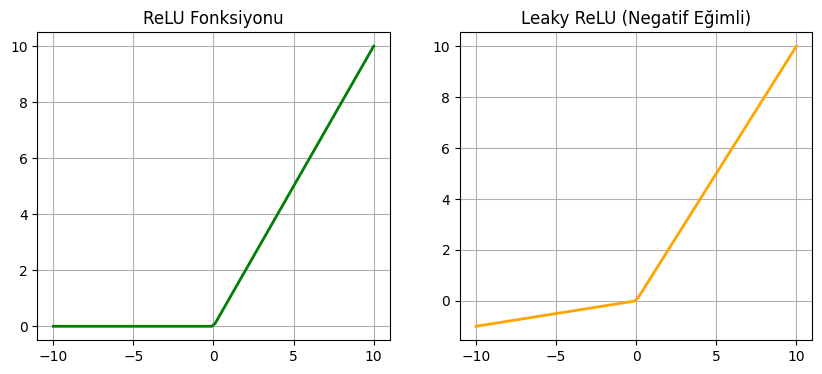

Ham Skorlar (Logits): [3.  1.  0.2]
Softmax Olasılıkları: [0.84 0.11 0.05]
Toplam Olasılık: 0.9999999999999999


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

def softmax(x):
    e_x = np.exp(x - np.max(x)) # Kararlılık için max çıkarılır
    return e_x / e_x.sum()

# --- ReLU Görselleştirme ---
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, relu(x), 'g', linewidth=2)
plt.title("ReLU Fonksiyonu")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, leaky_relu(x), 'orange', linewidth=2)
plt.title("Leaky ReLU (Negatif Eğimli)")
plt.grid(True)
plt.show()

# --- Softmax Örneği ---
scores = np.array([3.0, 1.0, 0.2])
probs = softmax(scores)

print("Ham Skorlar (Logits):", scores)
print("Softmax Olasılıkları:", np.round(probs, 2))
print("Toplam Olasılık:", np.sum(probs))

###Hangi Fonksiyonu Nerede Kullanmalıyım?
Bu "Altın Kural" tablosunu not edin:
| Katman | Problem Tipi | Önerilen Fonksiyon |
|--------|---------------|-------------------|
| Gizli Katmanlar | Hepsi | ReLU (veya Leaky ReLU) |
| Çıktı Katmanı | İkili Sınıflandırma (0/1) | Sigmoid |
| Çıktı Katmanı | Çoklu Sınıflandırma (Kedi/Kuş) | Softmax |
| Çıktı Katmanı | Regresyon (Fiyat Tahmini) | Linear (Identity) |


----------------
# 6- Çok Katmanlı Algılayıcılar (MLP): Gizli Katmanlar (Hidden Layers) ve Derinlik.
----------------
##Giriş: Takım Oyunu

Tek bir Perceptron (nöron), sadece düz bir çizgi çizebiliyordu. Peki ya problemimiz düz bir çizgiyle ayrılamıyorsa (XOR gibi)? Cevap: ***Daha fazla çizgi çizmek.***

Bunu yapmak için nöronları arka arkaya ve yan yana dizmemiz gerekir.

* **Girdi Katmanı (Input Layer):** Veriyi alan kapı.
* **Gizli Katmanlar (Hidden Layers):** İşin mutfağı. Girdiden özellikleri süzer, birleştirir ve anlamlandırır.
* **Çıktı Katmanı (Output Layer):** Son kararı veren yer.

Bir ağda en az bir gizli katman varsa, buna ***Çok Katmanlı Algılayıcı (Multilayer Perceptron - MLP)*** denir. Eğer gizli katman sayısı çok fazlaysa, buna ***Derin Öğrenme (Deep Learning)*** deriz.

##Evrensel Yaklaşım Teoremi (Universal Approximation Theorem)

Matematiksel olarak kanıtlanmış büyüleyici bir teorem vardır:

"Yeterli sayıda nörona sahip tek bir gizli katman bile, evrendeki herhangi bir sürekli fonksiyonu (ne kadar karmaşık olursa olsun) taklit edebilir."

Yani doğru ağırlıklarla ($w$) ve aktivasyon fonksiyonlarıyla ($ReLU$), nöronlar birleşerek bir kedinin şeklini, bir ses dalgasını veya borsa grafiğini çizebilir.

##Python Uygulaması: XOR Problemini Çözmek

Tek nöronun çözemediği XOR kapısını, <mark>sklearn</mark> kütüphanesindeki MLP (Multi-Layer Perceptron) ile çözelim. Bu sefer "2. Katman" (Gizli Katman) ekleyerek sorunun nasıl çocuk oyuncağına döndüğünü göreceksiniz.

In [6]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# XOR Veri Seti
# (0,0)->0, (1,1)->0, (0,1)->1, (1,0)->1
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# Modeli Kurma
# hidden_layer_sizes=(4,): Tek bir gizli katman olsun ve içinde 4 nöron olsun.
# activation='relu': Modern aktivasyon fonksiyonu.
# max_iter=2000: Öğrenmek için 2000 tur hakkı ver.
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=2000, random_state=1)

# Eğitim
mlp.fit(X, y)

# Tahmin
print("--- XOR Tahmin Sonuçları ---")
print(f"(0, 0) -> {mlp.predict([[0, 0]])[0]}")
print(f"(0, 1) -> {mlp.predict([[0, 1]])[0]}")
print(f"(1, 0) -> {mlp.predict([[1, 0]])[0]}")
print(f"(1, 1) -> {mlp.predict([[1, 1]])[0]}")

# Ağırlıklara Bakış
print("\nÖğrenilen Ağırlıklar (Katmanlar arası):")
print([coef.shape for coef in mlp.coefs_])
# Çıktı: [(2, 4), (4, 1)]
# Açıklama: 2 Girdi -> 4 Gizli Nöron -> 1 Çıktı

--- XOR Tahmin Sonuçları ---
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0

Öğrenilen Ağırlıklar (Katmanlar arası):
[(2, 4), (4, 1)]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


**Sonuç**

Model artık %100 doğrulukla XOR problemini çözebilir. Çünkü gizli katmandaki 4 nöron, uzayda birden fazla doğru çizerek o karmaşık sınırı oluşturmuştur.

--------------------
# 7- İleri Yayılım (Forward Propagation): Verinin ağ içindeki yolculuğu.
----------------

##Giriş: Nöronlar Nasıl Haberleşir?

Bir sinir ağına bir kedi fotoğrafı verdiğinizde, pikseller ($x$) girdi katmanından girer.Sırayla her katmanda ağırlıklarla çarpılır, toplanır, aktivasyondan geçer ve bir sonraki katmana aktarılır. En sonunda çıktı katmanından "Kedi: %98" sonucu çıkar.

Bu akışa ***İleri Yayılım (Forward Propagation)*** denir. Burada hiçbir öğrenme yoktur; sadece hesaplama vardır.

## Matematiksel Teori: Matris Çarpımı

Yazılımcılar <mark>for</mark> döngülerini sever ama derin öğrenme <mark>for</mark> döngüsünden nefret eder (çok yavaştır).Bunun yerine *Matris Çarpımı (Matrix Multiplication)* kullanılır. GPU'ların (ekran kartlarının) yapay zekâ için hayati olmasının sebebi, matris çarpımında çok hızlı olmalarıdır.
Formül (Bir katman için):

$$Z = X \cdot W + b$$$$A = f(Z)$$

* **$X$:** Girdi Matrisi (Örnek Sayısı x Özellik Sayısı)

* **$W$:** Ağırlık Matrisi (Girdi Nöronu x Çıktı Nöronu)
* **$Z$:** Net Girdi
* **$A$:** Aktivasyon (Sonraki katmanın girdisi olur)

##Python Uygulaması: Sıfırdan Sinir Ağı (NumPy ile)

Hazır kütüphane kullanmadan, sadece <mark>numpy</mark> ile 2 katmanlı bir ağın "İleri Yayılım" işlemini kodlayacağız. Bu kod, TensorFlow'un kaputunun altında çalışan mekanizmanın basitleştirilmiş halidir.

In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Ağırlıkları rastgele başlatıyoruz
        # W1: Girdi -> Gizli (Boyut: input x hidden)
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))

        # W2: Gizli -> Çıktı (Boyut: hidden x output)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        """
        Veriyi baştan sona taşır.
        """
        # --- KATMAN 1 (Girdi -> Gizli) ---
        # 1. Lineer İşlem (z = x.w + b)
        self.z1 = np.dot(X, self.W1) + self.b1
        # 2. Aktivasyon (a = sigmoid(z))
        self.a1 = sigmoid(self.z1)

        # --- KATMAN 2 (Gizli -> Çıktı) ---
        # 3. Lineer İşlem
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        # 4. Aktivasyon (Final Tahmin)
        output = sigmoid(self.z2)

        return output

# --- Test ---
# 3 Girdi (Örn: Yaş, Maaş, Puan), 4 Gizli Nöron, 1 Çıktı (0-1)
nn = SimpleNeuralNetwork(input_size=3, hidden_size=4, output_size=1)

# Rastgele bir veri (2 örnek)
X_test = np.array([
    [25, 50000, 8.5], # Müşteri 1 (Ölçeklenmemiş, göstermelik)
    [40, 90000, 4.2]  # Müşteri 2
])

tahminler = nn.forward(X_test)

print("Ağ Yapısı:")
print(f"W1 Boyutu: {nn.W1.shape}")
print(f"W2 Boyutu: {nn.W2.shape}")
print("\nModelin Tahminleri (Henüz eğitilmediği için rastgele):")
print(tahminler)

Ağ Yapısı:
W1 Boyutu: (3, 4)
W2 Boyutu: (4, 1)

Modelin Tahminleri (Henüz eğitilmediği için rastgele):
[[0.68191087]
 [0.68191087]]


/tmp/ipython-input-3140233198.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


###Kod Analizi
* <mark>np.dot(X, self.W1):</mark> İşte sihir burada. Yüzlerce nöronun işlemini tek satırda, aynı anda yapıyoruz.

* Sonuçta çıkan <mark>tahminler</mark> şu an tamamen saçmadır (rastgele ağırlıklar).

* Bu tahminlerin doğru olması için, hatayı hesaplayıp geriye dönmemiz (Backpropagation) ve <mark>W</mark> değerlerini güncellememiz gerekecek.

---------------
# 8- Yitim Fonksiyonları (Loss Functions): Hata nasıl ölçülür? (MSE vs Cross-Entropy).
--------------
##Giriş: "Ne Kadar Yanıldım?"

İleri yayılım (Forward Propagation) bittiğinde, ağımız bize bir tahmin sunar: "Bu resim %70 ihtimalle kedi."Ama gerçekte o resim bir köpekse (Etiket: 0, Tahmin: 0.7), büyük bir hata yapmışız demektir.

Sinir ağının amacı, bu hatayı (Loss/Cost) sıfıra indirmektir. Ancak hatayı nasıl hesapladığımız, çözmeye çalıştığımız problemin türüne göre değişir.

##Yaygın Yitim Fonksiyonları

**A. Regresyon İçin: MSE (Mean Squared Error)**

Eğer ev fiyatı tahmin ediyorsak (Sayısal çıktı), farkın karesini alırız.

$$L = \frac{1}{n} \sum (y - \hat{y})^2$$

* Hataların karesini aldığımız için, büyük hatalar çok daha ağır cezalandırılır. Model "biraz yanılmayı" göze alabilir ama "çok yanılmaktan" korkar.

**B. Sınıflandırma İçin: Cross-Entropy (Log Loss)**

Eğer Kedi/Köpek ayrımı yapıyorsak, olasılıkları karşılaştırırız.

* Gerçek: 1 (Kedi)
* Tahmin: 0.8 (Kedi) -> Hata Düşük.
* Tahmin: 0.2 (Kedi) -> Hata Çok Yüksek (Logaritmik olarak artar).

***Binary Cross-Entropy Formülü:***

$$L = - \frac{1}{n} \sum [y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]$$

##Python Uygulaması: Hatayı Kodlamak

Numpy kullanarak bu iki fonksiyonu elle hesaplayalım.

In [8]:
import numpy as np

# 1. MSE (Regresyon)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 2. Binary Cross Entropy (Sınıflandırma)
def binary_cross_entropy(y_true, y_pred):
    # Log(0) tanımsız olduğu için çok küçük bir epsilon ekleriz
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# --- Senaryo 1: Ev Fiyatı (Regresyon) ---
y_real_price = np.array([100, 150, 200])
y_pred_price = np.array([110, 140, 210]) # Yakın tahminler

mse_val = mean_squared_error(y_real_price, y_pred_price)
print(f"MSE Hatası: {mse_val:.2f}")

# --- Senaryo 2: Kanser Teşhisi (Sınıflandırma) ---
y_real_class = np.array([1, 0, 1])
y_pred_good  = np.array([0.9, 0.1, 0.8]) # İyi model
y_pred_bad   = np.array([0.2, 0.9, 0.3]) # Kötü model

loss_good = binary_cross_entropy(y_real_class, y_pred_good)
loss_bad  = binary_cross_entropy(y_real_class, y_pred_bad)

print(f"İyi Modelin Loss Değeri: {loss_good:.4f}")
print(f"Kötü Modelin Loss Değeri: {loss_bad:.4f}")

MSE Hatası: 100.00
İyi Modelin Loss Değeri: 0.1446
Kötü Modelin Loss Değeri: 1.7053


**Sonuç Yorumu**

Kötü modelin Loss değerinin çok yüksek çıktığını göreceksiniz. Sinir ağı eğitim sırasında şunu diyecek: *"Şu anki ağırlıklarım (W) bana yüksek Loss veriyor, onları değiştirmeliyim!"*

---------------
# 9- Optimizasyonun Kalbi: Gradyan İnişi (Gradient Descent) Mantığı.
--------------
##Giriş: Dağcı Analojisi

Gözleriniz bağlı bir şekilde, sisli ve engebeli bir dağın zirvesindesiniz. Amacınız en aşağıdaki vadiye (Minimum Loss noktasına) inmek.Ne yaparsınız?Ayağınızla etrafı yoklarsınız. Hangi yön *aşağı doğru eğimliyse*, o yöne küçük bir adım atarsınız.

İşte ***Gradient Descent***, bu sürecin adıdır.
* **Dağ:** Yitim Fonksiyonu (Loss Function).
* **Konumunuz:** O anki ağırlık değerleri ($w$).
* **Eğim:** Türev (Gradient).

* **Adım Boyu:** Öğrenme Oranı (Learning Rate).

## Matematiksel Teori: Türev ve Güncelleme

Bir fonksiyonun türevi, o fonksiyonun artış yönünü gösterir. Biz azaltmak istediğimiz için, türevin tersi yönünde gideriz.

Ağırlık Güncelleme Kuralı:

$$w_{yeni} = w_{eski} - \alpha \cdot \frac{\partial L}{\partial w}$$


* $\alpha$ (Alpha): *Learning Rate*. Adımımızın büyüklüğü.
    * Çok büyükse: Vadiyi ıskalayıp karşı tepeye sıçrayabiliriz (Overshooting).
    * Çok küçükse: İnmek yıllar sürer.
    
## Python Uygulaması: Bir Fonksiyonu Minimize Etmek

Basit bir parabol fonksiyonu ($y = x^2$) düşünün. Minimum noktası $x=0$'dır. Bilgisayarın rastgele bir noktadan başlayıp ($x=10$ gibi), türev alarak $0$ noktasına adım adım inişini simüle edelim.

Adım  | Konum (x)  | Eğim (Grad)
-----------------------------------
0     | 8.0000     | 20.0000
1     | 6.4000     | 16.0000
2     | 5.1200     | 12.8000
3     | 4.0960     | 10.2400
4     | 3.2768     | 8.1920
5     | 2.6214     | 6.5536
6     | 2.0972     | 5.2429
7     | 1.6777     | 4.1943
8     | 1.3422     | 3.3554
9     | 1.0737     | 2.6844
10    | 0.8590     | 2.1475
11    | 0.6872     | 1.7180
12    | 0.5498     | 1.3744
13    | 0.4398     | 1.0995
14    | 0.3518     | 0.8796
15    | 0.2815     | 0.7037
16    | 0.2252     | 0.5629
17    | 0.1801     | 0.4504
18    | 0.1441     | 0.3603
19    | 0.1153     | 0.2882


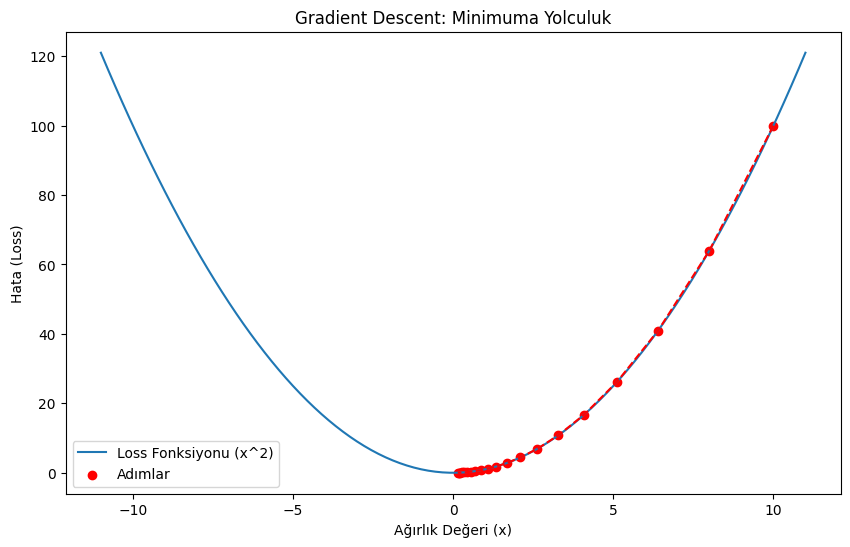

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Fonksiyon ve Türevi
def function(x):
    return x ** 2  # Yitim Fonksiyonu (Loss)

def derivative(x):
    return 2 * x   # Eğim (Gradient)

# 2. Parametreler
x_current = 10     # Başlangıç noktası (Rastgele)
learning_rate = 0.1
epochs = 20        # Adım sayısı

history_x = []
history_y = []

# 3. Gradyan İnişi Döngüsü
print(f"{'Adım':<5} | {'Konum (x)':<10} | {'Eğim (Grad)':<10}")
print("-" * 35)

for i in range(epochs):
    history_x.append(x_current)
    history_y.append(function(x_current))

    # Eğim hesapla
    grad = derivative(x_current)

    # Konumu güncelle (Türevin tersi yönünde)
    # x = x - (lr * grad)
    x_current = x_current - (learning_rate * grad)

    print(f"{i:<5} | {x_current:.4f}     | {grad:.4f}")

# 4. Görselleştirme
x_vals = np.linspace(-11, 11, 100)
y_vals = function(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Loss Fonksiyonu (x^2)')
plt.scatter(history_x, history_y, color='red', label='Adımlar')
plt.plot(history_x, history_y, color='red', linestyle='--')
plt.title('Gradient Descent: Minimuma Yolculuk')
plt.xlabel('Ağırlık Değeri (x)')
plt.ylabel('Hata (Loss)')
plt.legend()
plt.show()

###Kod Analizi ve Çıktı

Çıktıya baktığınızda, $x$ değerinin <mark>10 -> 8 -> 6.4 ... -> 0.1</mark> şeklinde hızla 0'a yaklaştığını göreceksiniz.

* İlk adımlar büyüktür (çünkü eğim diktir).
* Sona yaklaştıkça adımlar küçülür (çünkü eğim azalır). Bu mükemmel bir özelliktir; tam hedefe yaklaşırken fren yapmış oluruz.

##Sorun: Yerel Minimumlar (Local Minima)

Eğer fonksiyonumuz basit bir çanak ($x^2$) değil de, engebeli bir araziyse?Algoritma, en derin vadiye (Global Minimum) inmek yerine, yoldaki küçük bir çukura (Local Minimum) takılıp kalabilir. Çünkü orada da eğim sıfırdır.Bunu çözmek için ileride Momentum ve Adam gibi gelişmiş optimizasyoncuları göreceğiz.

------------------
# 10- Geri Yayılım (Backpropagation) 1: Hatanın geriye doğru dağıtılması (Zincir Kuralı).
-----------------
##Giriş: "Suçlu Kim?"

Bir şirkette büyük bir proje başarısız oldu (Hata yüksek). Patron (Loss Function), faturayı kime kesecek?
* Sadece en alttaki işçiye mi? (Çıktı Katmanı)
* Yoksa ona yanlış emir veren müdüre mi? (Gizli Katman)

***Backpropagation***, hatadaki payı oranında her nöronun ağırlığını cezalandırma (güncelleme) sanatıdır. Çıktı katmanındaki hata kolayca hesaplanır, ancak gizli katmandaki hatayı doğrudan göremeyiz. Bu yüzden hatayı *geriye doğru* yayarız.

##Matematiksel Teori: Zincir Kuralı (Chain Rule)

Lise matematiğindeki türev dersini hatırlayalım. İç içe geçmiş fonksiyonların türevi nasıl alınırdı?

Eğer $y = f(u)$ ve $u = g(x)$ ise;

$$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$$

Sinir ağlarında da durum budur. Hata ($L$), Çıktıya ($y$) bağlıdır. Çıktı, Gizli Katmana ($h$) bağlıdır. Gizli Katman, Ağırlığa ($w$) bağlıdır.

Bu zinciri kurarsak:

$$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h} \cdot \frac{\partial h}{\partial w}$$

Bu formül sayesinde, ağın en başındaki bir ağırlığın hataya ne kadar katkı sağladığını hesaplayabiliriz.

##Adım Adım Geri Yayılım Süreci

1. ***İleri Yayılım:*** Girdiyi al, tahmin üret ($y_{pred}$).
2. ***Hatayı Hesapla:*** $L = (y_{real} - y_{pred})^2$.
3. ***Geriye Doğru Türev Al:***
    * Önce Çıktı Katmanı ile Gizli Katman arasındaki ağırlıkların ($W_2$) gradyanını hesapla.
    * Sonra Zincir Kuralı ile bir adım daha geriye git ve Girdi ile Gizli Katman arasındaki ağırlıkların ($W_1$) gradyanını hesapla.
4. ***Güncelle:*** $W = W - (LearningRate \cdot Gradient)$.

##Neden Bu Kadar Önemli?

1986'da Geoffrey Hinton ve arkadaşları bu yöntemi popüler hale getirene kadar, çok katmanlı ağları eğitmenin bir yolu bilinmiyordu. Backpropagation, modern yapay zekânın (ChatGPT, Midjourney) çalışmasını sağlayan temel motordur.

-----------------
# 11- Geri Yayılım (Backpropagation) 2: Matematiğin Python ile "Sıfırdan" Kodlanması.
--------------
## Giriş: Matematiği Koda Dökmek

Teori güzeldir ama kod çalışana kadar sadece bir hayaldir. Şimdi <mark>TensorFlow</mark> veya <mark>PyTorch</mark> kullanmadan, sadece <mark>NumPy</mark> ile **XOR problemini çözen** tam teşekküllü bir sinir ağı yazacağız. Bu kodu anlarsanız, Derin Öğrenmenin %80'ini anlamışsınız demektir.

##Python Uygulaması: Neural Network Sınıfı

Burada kritik nokta <mark>sigmoid_derivative</mark> fonksiyonudur. Sigmoid'in türevi: $f(x) \cdot (1 - f(x))$ şeklindedir.Python

--- Tahminler ---
[[0.00982019]
 [0.98168038]
 [0.98026359]
 [0.02272246]]


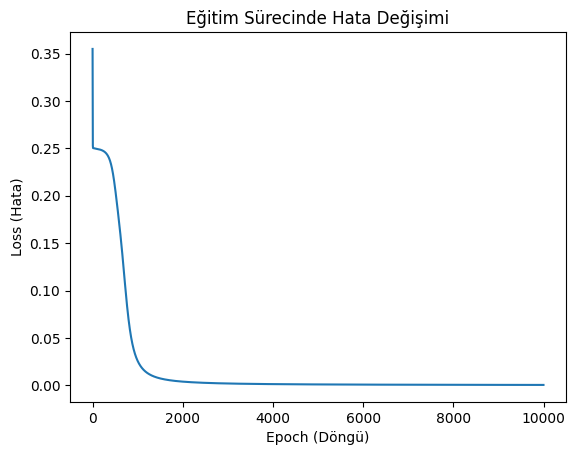

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Aktivasyon Fonksiyonu ve Türevi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x) # x burada zaten sigmoid çıktısıdır

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Ağırlıkları Rastgele Başlat
        self.W1 = np.random.uniform(size=(input_size, hidden_size))
        self.b1 = np.random.uniform(size=(1, hidden_size))
        self.W2 = np.random.uniform(size=(hidden_size, output_size))
        self.b2 = np.random.uniform(size=(1, output_size))

        # Hata geçmişini tutalım
        self.loss_history = []

    def forward(self, X):
        # --- İleri Yayılım ---
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1) # Gizli Katman Çıktısı

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = sigmoid(self.z2) # Final Tahmin
        return self.output

    def backward(self, X, y, output, learning_rate):
        # --- Geri Yayılım (Backpropagation) ---

        # 1. Çıktı Katmanındaki Hata Payı
        error = y - output
        # Çıktı katmanı için Delta (Hata * Türev)
        d_output = error * sigmoid_derivative(output)

        # 2. Gizli Katmandaki Hata Payı
        # Hata geriye, W2 üzerinden yayılır
        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # 3. Ağırlıkları Güncelle (Gradient Descent)
        self.W2 += self.a1.T.dot(d_output) * learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        self.W1 += X.T.dot(d_hidden) * learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

            # Hatayı kaydet (MSE)
            loss = np.mean(np.square(y - output))
            self.loss_history.append(loss)

# --- XOR Problemi Testi ---
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Model: 2 Girdi -> 4 Gizli Nöron -> 1 Çıktı
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.5)

print("--- Tahminler ---")
print(nn.forward(X)) # [0, 1, 1, 0]'a çok yakın olmalı

# --- Hata Grafiği ---
plt.plot(nn.loss_history)
plt.title("Eğitim Sürecinde Hata Değişimi")
plt.xlabel("Epoch (Döngü)")
plt.ylabel("Loss (Hata)")
plt.show()

**Kod Analizi**

* Grafiği çizdiğinizde, hatanın (Loss) başlangıçta yüksek olduğunu, ancak binlerce döngüden sonra hızla sıfıra yaklaştığını göreceksiniz.

* <mark>d_output</mark> ve <mark>d_hidden</mark> değişkenleri, Zincir Kuralı'nın koddaki karşılığıdır.

----------------
# 12- TensorFlow ve Keras'a Giriş: İlk modern sinir ağımızı kuruyoruz.
----------------

## Giriş: Neden Framework Kullanıyoruz?
Önceki bölümde NumPy ile yazdığımız kod harikaydı ama sürdürülebilir değildi. Milyonlarca parametreli bir ağı elle türev alarak yönetemezsiniz.

Bunun için ***Deep Learning Framework***'leri geliştirildi.

* ***TensorFlow (Google):*** Endüstri standardı. Üretime (Production) yatkın.

* ***PyTorch (Meta):*** Araştırma dünyasında çok popüler. Esnek.

* ***Keras:*** TensorFlow'un üzerine kurulmuş, "insanlar için" tasarlanmış yüksek seviyeli bir API. Biz eğitimimizde en kolay anlaşılır olduğu için Keras kullanacağız.

##Temel Kavramlar: Tensör Nedir?
<mark>NumPy</mark> dizilerine (Array) çok benzerler ama iki süper güçleri vardır:

1. **GPU Hızlandırma:** Ekran kartında çalışabilirler.

2. **Otomatik Türev (Autograd):** <mark> backward()</mark> fonksiyonunu sizin yerinize otomatik hesaplarlar.

##Python Uygulaması: Keras ile İlk Model
Hatırlarsanız XOR problemini çözmek için Numpy ile uzun uzun <mark>class</mark> yazmıştık. Şimdi aynı işi Keras ile nasıl 5 satırda yapacağımızı görelim.


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# 1. Veri Seti (XOR)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# 2. Modeli İnşa Etme (Lego gibi)
# Sequential: Katmanların arka arkaya dizildiği yapı.
model = Sequential()

# Gizli Katman: 4 Nöron, Aktivasyon 'ReLU'
# input_dim=2: Çünkü girdimiz (0,0) gibi 2 elemanlı.
model.add(Dense(4, input_dim=2, activation='relu'))

# Çıktı Katmanı: 1 Nöron (0 veya 1 sonucu için), Aktivasyon 'Sigmoid'
model.add(Dense(1, activation='sigmoid'))

# 3. Derleme (Compile)
# Optimizer: 'adam' (Gradyan inişinin akıllı versiyonu)
# Loss: 'binary_crossentropy' (Sınıflandırma hatası)
# Metrics: 'accuracy' (Başarıyı takip et)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Eğitim (Fit)
# epochs=2000: Veriyi 2000 kere gör.
# verbose=0: Ekrana sürekli yazı basma.
print("Eğitim Başlıyor...")
model.fit(X, y, epochs=2000, verbose=0)

# 5. Tahmin
print("\n--- Keras Tahminleri ---")
print(model.predict(X).round())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eğitim Başlıyor...

--- Keras Tahminleri ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[1.]
 [1.]
 [1.]
 [0.]]


**Kod Analizi**
* ***Dense:*** Tam bağlantılı (Fully Connected) katman demektir. Her nöron önceki katmandaki tüm nöronlara bağlıdır.

* Kodun sadeliğine dikkat edin. Ağırlık başlatma, ileri yayılım, türev alma, ağırlık güncelleme... Hepsi ***model.fit()*** içinde otomatik halledildi.

---------------
# 13- Stokastik Gradyan İnişi (SGD) vs Batch: Öğrenme stratejileri.
--------------

##Giriş: "Hepsini mi Okuyayım, Tek Tek mi?"

Modelimiz öğrenirken ağırlıklarını günceller ($w = w - \text{lr} \cdot \text{grad}$).Peki bu güncellemeyi ne sıklıkla yapmalı?

Önümüzde 10.000 soruluk bir test kitabı olduğunu düşünün.

1. **Batch GD:** 10.000 sorunun hepsini çöz, kontrol et, hatalarını öğren. (Çok sağlam ama çok yavaş).
2. **Stochastic GD (SGD):** 1 soruyu çöz, hemen kontrol et, öğren. Sonra 2. soruya geç. (Çok hızlı ama çok zig-zaglı/gürültülü).
3. **Mini-Batch GD:** 32 soruluk bir test çöz, kontrol et, öğren. (En dengeli yöntem).

Endüstride standart olarak Mini-Batch kullanılır.

##Kavramlar: Epoch, Batch Size, Iteration

Bu terimler mülakatların vazgeçilmezidir.

* **Epoch (Epok):** Tüm veri setinin eğitimden bir kez geçmesi.
* **Batch Size:** Ağırlık güncellemesi yapılmadan önce işlenen veri sayısı. (Genelde 32, 64, 128 gibi 2'nin üsleri seçilir).
* **Iteration (İterasyon):** Bir epoch'u tamamlamak için gereken adım sayısı.
   * Örn: 1000 veriniz var, Batch Size = 100 ise; 1 Epoch = 10 İterasyon sürer.
   
## Python Uygulaması: Farkı Görme

kKeras'ta bu ayarı <mark>batch_size</mark> parametresi ile yaparız. Büyük bir veri setinde (örneğin MNIST rakamları) hız farkını test edelim.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. MNIST Verisini Yükle (70.000 El Yazısı Rakam)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Veriyi Düzenle (Flatten + Scale)
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10) # One-Hot Encoding

# Model Fonksiyonu (Tekrar tekrar kullanmak için)
def create_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- DENEY 1: Stochastic GD (Batch Size = 1) ---
# Her örnekte güncelleme yapar. Çok yavaş olması beklenir.
print("--- Stochastic GD (Batch Size = 1) ---")
model_sgd = create_model()
start = time.time()
# Sadece 1 Epoch yapalım ki çok beklemeyelim
model_sgd.fit(X_train[:1000], y_train[:1000], batch_size=1, epochs=1, verbose=0)
print(f"Süre: {time.time() - start:.2f} saniye (Sadece 1000 veri için)")

# --- DENEY 2: Mini-Batch GD (Batch Size = 64) ---
# İdeal denge.
print("\n--- Mini-Batch GD (Batch Size = 64) ---")
model_mb = create_model()
start = time.time()
model_mb.fit(X_train[:1000], y_train[:1000], batch_size=64, epochs=1, verbose=0)
print(f"Süre: {time.time() - start:.2f} saniye")

# --- DENEY 3: Batch GD (Batch Size = Tüm Veri) ---
# Hepsini okuyup tek seferde günceller.
print("\n--- Full Batch GD ---")
model_batch = create_model()
start = time.time()
model_batch.fit(X_train[:1000], y_train[:1000], batch_size=1000, epochs=1, verbose=0)
print(f"Süre: {time.time() - start:.2f} saniye")

--- Stochastic GD (Batch Size = 1) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Süre: 5.04 saniye (Sadece 1000 veri için)

--- Mini-Batch GD (Batch Size = 64) ---
Süre: 0.65 saniye

--- Full Batch GD ---
Süre: 0.49 saniye


###Sonuç Yorumu
* <mark>Stochastic:</mark> Çok yavaştır çünkü binlerce kez ağırlık günceller. Loss grafiği çok titrek olur.

* <mark>Batch</mark>: Hızlıdır ama hafızayı (RAM) şişirir. Ayrıca "yerel minimum" (çukurlar) tuzağına düşme riski yüksektir.

* <mark>Mini-Batch</mark>: En sağlıklısıdır. Hem hızlıdır hem de biraz gürültü içerdiği için yerel minimumlardan zıplayarak kurtulabilir.

----------------
# 14- Aşırı Öğrenme (Overfitting) ile Savaş 1: Dropout Katmanı.
-------------

## Giriş: Çok Bilen Çok Yanılır
Elinizde 1000 soruluk bir soru bankası var. Modeliniz bu soruları defalarca çözdü ve artık %100 başarıya ulaştı. Ama ona kitapta olmayan 1001. soruyu sorduğunuzda yanlış cevap veriyor. Neden? Çünkü o, "Mantığı" öğrenmedi, "Soruyu" ezberledi.

Grafiksel olarak baktığınızda;

* **Eğitim Hatası (Training Loss):** Sürekli düşer.

* **Doğrulama Hatası (Validation Loss):** Bir noktadan sonra yükselmeye başlar. İşte bu ayrım noktası (Divergence), Overfitting'in başladığı yerdir.

##Çözüm: Dropout Katmanı
2014'te Srivastava ve Hinton tarafından önerilen bu yöntem, delice ama dahiyane bir fikre dayanır: *"Eğitim sırasında nöronların bir kısmını rastgele kapat!"*

Her eğitim adımında (batch), nöronların örneğin %50'sini rastgele seçip iptal ederiz (değerini 0 yaparız). Bu ne işe yarar?

1. Nöronlar birbirine güvenemez hale gelir ("Yanımızdaki nöron her an gidebilir, işimi kendim yapmalıyım").

2. Ağ, tek bir özelliğe (örneğin kedinin kulağına) aşırı odaklanamaz, resmin geneline bakmak zorunda kalır.

3. Aslında tek bir büyük ağ yerine, binlerce farklı "küçük ağ" eğitmiş gibi olursunuz (Ensemble etkisi).

#Python Uygulaması: Keras ile Dropout
Keras'ta <mark>Dropout</mark> bir katman olarak eklenir. <mark>Dropout(0.5)</mark> demek, her adımda nöronların yarısını kapat demektir.



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


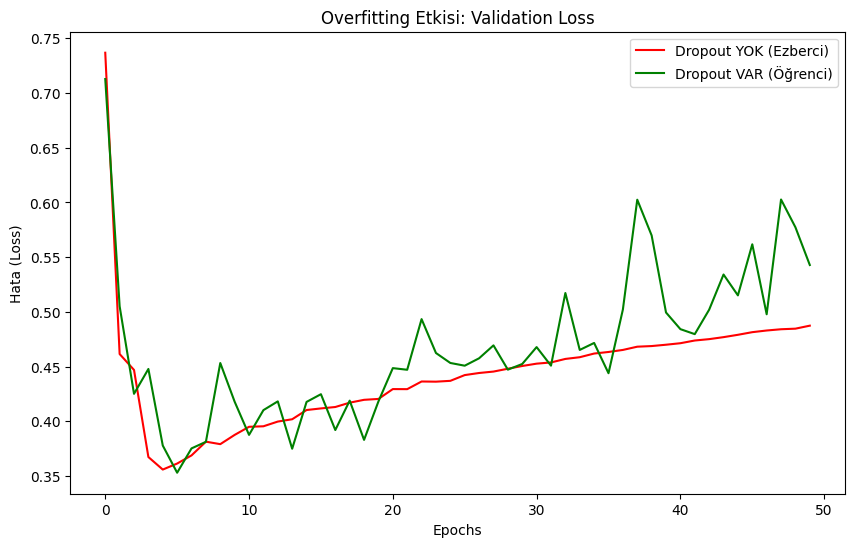

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. Veri Hazırlığı
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Veriyi bilerek küçültelim ki Overfitting artsın (Ezberlemek kolaylaşsın)
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]

def create_model(use_dropout=False):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))

    if use_dropout:
        model.add(Dropout(0.5)) # %50'sini kapat

    model.add(Dense(512, activation='relu'))

    if use_dropout:
        model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 2. Modelleri Eğitme
epochs = 50

# Dropout YOK
model_no_drop = create_model(use_dropout=False)
hist_no_drop = model_no_drop.fit(X_train_small, y_train_small,
                                 validation_data=(X_test, y_test),
                                 epochs=epochs, verbose=0)

# Dropout VAR
model_drop = create_model(use_dropout=True)
hist_drop = model_drop.fit(X_train_small, y_train_small,
                           validation_data=(X_test, y_test),
                           epochs=epochs, verbose=0)

# 3. Karşılaştırma Grafiği (Validation Loss)
plt.figure(figsize=(10, 6))
plt.plot(hist_no_drop.history['val_loss'], label='Dropout YOK (Ezberci)', color='red')
plt.plot(hist_drop.history['val_loss'], label='Dropout VAR (Öğrenci)', color='green')
plt.title('Overfitting Etkisi: Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Hata (Loss)')
plt.legend()
plt.show()

###Grafik Yorumu
Grafiğe baktığınızda, ***Kırmızı Çizginin (Dropout Yok)*** bir süre sonra yukarı doğru fırladığını (Overfitting) göreceksiniz.***Yeşil Çizgi (Dropout Var)*** ise daha stabil ve düşük bir hatada kalacaktır. Dropout, modelin genelleme yeteneğini artırmıştır.

---------------
# 15- Aşırı Öğrenme ile Savaş 2: Erken Durdurma (Early Stopping) ve L1/L2 Regularization.
---------------

##Giriş: Zirvede Bırakmak

Bir kumarhanede olduğunuzu düşünün. Kazanıyorsunuz, kazanıyorsunuz... Ama bir noktada şansınız dönecek ve kaybetmeye başlayacaksınız. En akıllıca hamle nedir? Tam kazanırken kalkmak.

Yapay zekâ eğitiminde de durum budur. Model eğitim verisini ezberlemeye başladığı anda eğitimi kesmeliyiz. Buna ***Erken Durdurma (Early Stopping)*** denir.

##L1 ve L2 Regularization (Ceza Puanı)
Başka bir yöntem ise modele "karmaşıklaşırsa ceza kesmektir".Modelin ağırlıkları ($w$) çok büyürse, model çok keskin ve karmaşık sınırlar çizer (Overfitting).Yitim fonksiyonuna ($L$) ek bir terim ekleriz:

* **L1 Regularization (Lasso):** Ağırlıkların mutlak değerini cezaya ekler. Bazı ağırlıkları tamamen sıfırlar. (Gereksiz özellikleri yok eder).

* **L2 Regularization (Ridge):** Ağırlıkların karesini cezaya ekler. Ağırlıkları sıfırlamaz ama küçültür. (En yaygın yöntemdir).

$$Loss_{yeni} = Loss_{eski} + \lambda \sum w^2$$

##Python Uygulaması: Callbacks ve Regularizers

Keras'ta eğitimi canlı izleyen ve müdahale eden ajanlara Callbacks denir.

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# 1. Model Tanımı (L2 Regularization ile)
# kernel_regularizer=l2(0.01): Ağırlıklar büyürse cezalandır
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 2. Erken Durdurma Ajanı (Early Stopping)
# monitor='val_loss': Test hatasını izle.
# patience=5: Hata artmaya başlarsa hemen durma, 5 epoch daha şans ver. Düzelmezse dur.
# restore_best_weights=True: Durduğunda, en son hali değil, en iyi halini geri yükle.
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True,
                           verbose=1)

# 3. Eğitim
# callbacks=[early_stop]: Ajanı eğitime dahil et.
history = model.fit(X_train_small, y_train_small,
                    validation_data=(X_test, y_test),
                    epochs=200, # Normalde 200 çok fazla ama Early Stopping durduracak.
                    batch_size=64,
                    callbacks=[early_stop],
                    verbose=1)

print(f"Eğitim {len(history.epoch)} epoch sürdü ve durduruldu.")

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3449 - loss: 2.5500 - val_accuracy: 0.7764 - val_loss: 1.4239
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8358 - loss: 1.1787 - val_accuracy: 0.8274 - val_loss: 1.0010
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8548 - loss: 0.9024 - val_accuracy: 0.8585 - val_loss: 0.8481
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8908 - loss: 0.7463 - val_accuracy: 0.8748 - val_loss: 0.7763
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9250 - loss: 0.6210 - val_accuracy: 0.8741 - val_loss: 0.7447
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9406 - loss: 0.5394 - val_accuracy: 0.8779 - val_loss: 0.7104
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9463 - loss: 0.5543 - val_accuracy: 0.8790 - val_loss: 0.6946
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9513 - loss: 0.5187 - val_accuracy: 

---------------
# 16- Hiperparametreler: Epoch, Batch Size ve Learning Rate Ayarı.
---------------

##Giriş: Parametre vs Hiperparametre

Makine öğrenmesinde iki tür değişken vardır ve bunları karıştırmak ölümcüldür:
1. **Parametreler:** Modelin kendi kendine öğrendiği değerler (Ağırlıklar ve Bias). Bunlara biz dokunamayız.

2. **Hiperparametreler:** Eğitim başlamadan önce bizim ayarladığımız değerler. (Epoch sayısı, Öğrenme Hızı, Katman Sayısı vb.)

Bu bölümde en kritik 3 hiperparametreyi inceleyeceğiz.

##Öğrenme Oranı (Learning Rate - $\alpha$)
Bu, derin öğrenmenin en önemli ayarıdır. Gradyan inişi sırasında atılacak adımın büyüklüğünü belirler.

* **Çok Büyük ($\alpha = 0.1$):** Hızla inersiniz ama vadinin dibini (minimum noktayı) ıskalayıp karşı tepeye savrulabilirsiniz. Hatta hata (Loss) giderek artabilir (Divergence).
* **Çok Küçük ($\alpha = 0.00001$):** Hedefe ulaşmak sonsuza kadar sürer.
* **İdeal:** Başta büyük adımlarla inip, hedefe yaklaştıkça yavaşlamak (Decay).
##Epoch ve Batch Size

* **Epoch (Devir):** Modelin tüm eğitim verisini kaç kez göreceğidir.  
    * Az olursa: Öğrenemez (Underfitting).
    * Çok olursa: Ezberler (Overfitting).
* **Batch Size (Parti Boyutu):** Ağırlıkları güncellemek için kaç verinin hatasına bakılacağı.
    * Küçük Batch (32): Gürültülüdür ama yerel tuzaklardan kurtulur. Genelleme yeteneği yüksektir.
    * Büyük Batch (1024): İşlemciyi verimli kullanır, hızlıdır ama "keskin" bir minimuma saplanabilir.
##Python Uygulaması: Learning Rate Scheduling
Sabit bir öğrenme hızı kullanmak yerine, eğitim ilerledikçe hızı düşüren (sönümleyen) bir strateji uygulayacağız.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Basit bir XOR benzeri veri
X = np.random.rand(1000, 20)
y = np.random.randint(2, size=(1000, 1))

model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

# --- STRATEJİ: Her 10 Epoch'ta hızı yarıya düşür ---
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.5

# Callback tanımla
lr_schedule = LearningRateScheduler(scheduler, verbose=1)

# Başlangıç hızı (nispeten yüksek)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Eğitim
history = model.fit(X, y, epochs=20, callbacks=[lr_schedule], verbose=0)

# Sonuç: Ekranda lr değerinin 0.01 -> 0.005 -> 0.0025 diye azaldığını göreceksiniz.


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 6: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 7: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 8: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 9: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 10: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 11: LearningRateScheduler setting learning rate to 0.004999999888241291.

Epoch 12: LearningRateScheduler setting learning rate to 0.0024999999441206455.

Epoch 13: LearningRateScheduler setting learnin

###Neden Bunu Yaptık?
Dağın zirvesindeyken (eğitimin başı) koşarak inebiliriz. Ama vadinin dibine (minimuma) yaklaştığımızda, en ufak bir yanlış adım bizi hedeften uzaklaştırır. Bu yüzden sona doğru "parmak uçlarımızla" yürümeliyiz.

-----------
# 17- Modern Optimizasyoncular: Momentum, RMSProp ve Adam Optimizer.
------------
##Giriş: SGD'nin Aptallığı
Standart ***Stokastik Gradyan İnişi (SGD)*** biraz "şaşkın" bir dağcıdır. Sadece o an bastığı yerin eğimine bakar. Eğer bir çukura (Local Minima) girerse, eğim sıfır olduğu için "Hah, geldim!" der ve orada kalır. Halbuki asıl vadi (Global Minimum) biraz ileridedir. Ayrıca düz alanlarda (Plateau) çok yavaş ilerler.

Bize daha zeki, hızını koruyan ve yönünü düzelten algoritmalar lazım.

##Momentum ve RMSProp
**A. Momentum (Fizik Kuralları)**
Bir topu yokuştan yuvarlarsanız ne olur? Hızlanır. Çukura girse bile hızı (momentumu) sayesinde o çukurdan çıkıp yoluna devam edebilir.

* SGD + Momentum, önceki güncellemelerin bir kısmını hafızada tutar ve o yönde gitmeye devam eder.

**B. RMSProp (Root Mean Square Propagation)**
Her parametre için farklı öğrenme hızı kullanır.

* Çok dik yönlerde (hata çok değişiyor) adımları küçültür (temkinli olur).

* Düz yönlerde (hata az değişiyor) adımları büyütür (hızlanır).

##Kralın Gelişi: Adam (Adaptive Moment Estimation)
Adam, Momentum ve RMSProp'un birleşimidir.

1. Momentum gibi hızı korur.

2. RMSProp gibi her parametreye özel hız ayarlar.

Bugün bir Derin Öğrenme projesine başlarken varsayılan optimizer neredeyse her zaman ***Adam***'dır.

##Python Uygulaması: SGD vs Adam Yarışı
Keras kullanarak aynı modeli, aynı veriyi, aynı epoch sayısında iki farklı optimizer ile eğitelim ve farkı görelim.



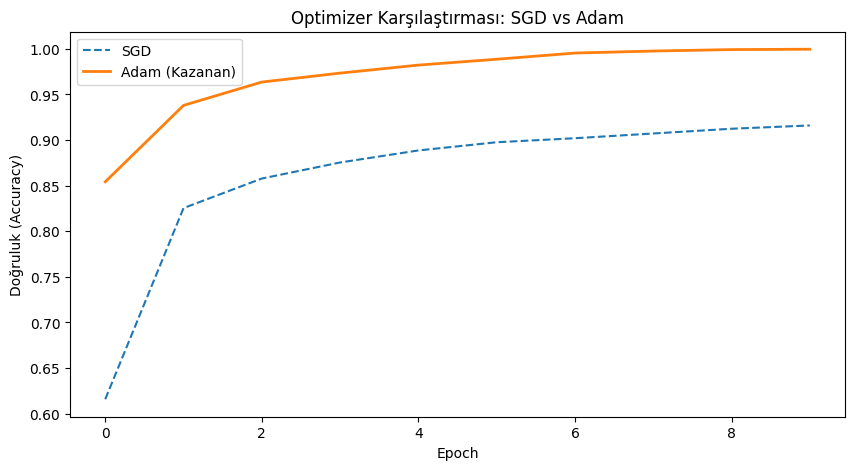

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Veri Hazırlığı
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)

def get_model():
    return Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])

# 1. SGD Modeli
model_sgd = get_model()
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist_sgd = model_sgd.fit(X_train[:5000], y_train[:5000], epochs=10, batch_size=32, verbose=0)

# 2. Adam Modeli
model_adam = get_model()
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist_adam = model_adam.fit(X_train[:5000], y_train[:5000], epochs=10, batch_size=32, verbose=0)

# 3. Yarış Sonucu
plt.figure(figsize=(10, 5))
plt.plot(hist_sgd.history['accuracy'], label='SGD', linestyle='--')
plt.plot(hist_adam.history['accuracy'], label='Adam (Kazanan)', linewidth=2)
plt.title('Optimizer Karşılaştırması: SGD vs Adam')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk (Accuracy)')
plt.legend()
plt.show()

###Grafik Yorumu

Grafikte şunu göreceksiniz: ***Adam***, daha ilk epoch'ta %85 başarıya fırlarken, ***SGD*** yavaş yavaş %60'lardan tırmanmaya çalışır. Adam, karmaşık yüzeylerde yönünü çok daha hızlı bulur.

Not: SGD kötü değildir; doğru ayarlandığında (Momentum + Learning Rate Schedule) bazen Adam'dan daha iyi "genelleme" yapabilir ve daha yüksek final başarısına ulaşabilir. Ama Adam "kutudan çıktığı haliyle" (out-of-the-box) genellikle en iyi sonucu verir.

-------------
# 18- Ağırlaştırma (Initialization): Xavier ve He Başlatma Yöntemleri.
----------------
##Giriş: Neden Sıfırdan Başlamıyoruz?

Mantıklı bir soru: "Neden tüm ağırlıkları ($w$) başlangıçta 0 yapmıyoruz?"Cevap: ***Simetri Problemi***.Eğer tüm ağırlıklar 0 (veya aynı sayı) olursa, tüm nöronlar aynı işlemi yapar, aynı hatayı bulur ve aynı şekilde güncellenir. 1000 nöronunuz da olsa, hepsi tek bir nöron gibi davranır (Zombi Nöronlar). Bu yüzden ***rastgelelik*** şarttır.

Peki rastgele sayıları nasıl seçeceğiz?

* **Çok Küçük:** Sinyal katmanlar arasında ilerlerken sönümlenir ve yok olur (Vanishing Gradient).
* **Çok Büyük:** Sinyal patlar ve aktivasyon fonksiyonlarını (Sigmoid/Tanh) doygunluğa ulaştırır (Exploding Gradient).

##Modern Çözümler: Xavier ve He

Doğru başlatma, sinyalin varyansını (dağılımını) girişten çıkışa kadar sabit tutmayı hedefler.

**A. Xavier (Glorot) Başlatma**

* ***Kullanım:*** Sigmoid veya Tanh aktivasyonları için idealdir.
* ***Mantık:*** Ağırlıkları, girdi ve çıktı sayısına bağlı özel bir aralıktan seçer.

**B. He Başlatma (He Initialization)**
* ***Kullanım:*** ReLU ve türevleri için idealdir. (Günümüzde varsayılan budur).
* ***Mantık:*** ReLU negatifleri sıfırladığı için sinyal gücünü yarıya düşürür. "He" yöntemi, varyansı korumak için ağırlıkları biraz daha geniş bir aralıktan seçer.
##Python Uygulaması: Keras ile Başlatma
Keras'ta katman tanımlarken <mark>kernel_initializer</mark> parametresi ile bu ayarı yaparız.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal, GlorotNormal

# Model Tanımı
model = Sequential()

# Katman 1: ReLU kullanıyorsak -> 'HeNormal' (he_normal)
model.add(Dense(64, activation='relu',
                input_dim=20,
                kernel_initializer='he_normal'))

# Katman 2: Sigmoid kullanıyorsak -> 'GlorotNormal' (glorot_normal)
model.add(Dense(32, activation='sigmoid',
                kernel_initializer='glorot_normal'))

# Çıktı Katmanı
model.add(Dense(1, activation='sigmoid'))

print("Model başarıyla (ve doğru ağırlıklarla) kuruldu.")

Model başarıyla (ve doğru ağırlıklarla) kuruldu.


###Özet Kural

* Aktivasyon **ReLU** ise $\rightarrow$ <mark>he_normal</mark>

* Aktivasyon **Sigmoid/Tanh** ise $\rightarrow$ <mark>glorot_normal</mark> (Xavier)Bu basit kural, eğitimin ilk epoch'larda tıkanmasını engeller.

--------------
# 19- Batch Normalization: Eğitimi hızlandırma ve stabilize etme sanatı.
---------------
##Giriş: Değişen Zemin Problemi
Makine öğrenmesinin başında veriyi "Scale" etmenin (0-1 arasına çekmenin) ne kadar önemli olduğunu görmüştük. Peki ya ağın içindeki gizli katmanlar?

Birinci katman, ağırlıkları güncellediğinde, ikinci katmana giden verinin dağılımı tamamen değişir. İkinci katman sürekli "değişen bir zeminde" yürümeye çalışır. Buna **Internal Covariate Shift** denir. Bu durum eğitimi yavaşlatır.

Çözüm: **Batch Normalization (BN)**. Ağın her katmanında, veriyi tekrar normalize ederiz (Ortalamayı çıkar, varyansa böl).

##Batch Norm'un Faydaları
1. ***Hız:*** Eğitimi inanılmaz hızlandırır (Daha az epoch gerekir).

2. ***Yüksek Learning Rate:*** Daha cesur (büyük) öğrenme adımları atabilirsiniz, model dağılmaz.

3. ***Regularization Etkisi:*** Dropout gibi davranarak hafif bir ezber bozucu etkisi vardır.

##Python Uygulaması: Turbo Modu Açmak
Batch Norm, Keras'ta bir katman olarak eklenir. Genellikle Lineer işlem ile Aktivasyon arasına konur.

* Sıralama: <mark>Dense</mark> -> <mark>BatchNormalization</mark> -> <mark>Activation</mark> (veya <mark>ReLU</mark>).

Standart Model Eğitiliyor...
Batch Norm Modeli Eğitiliyor...


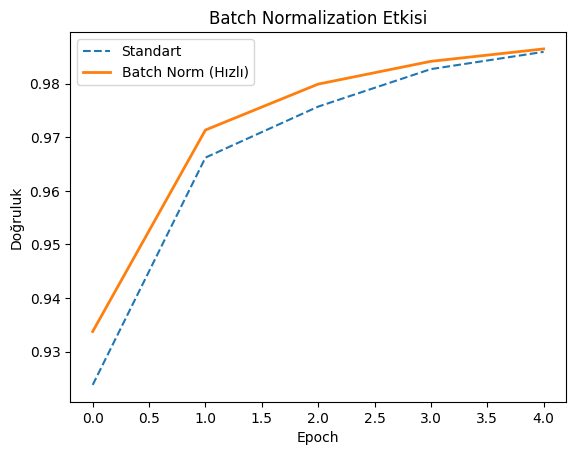

In [8]:
from tensorflow.keras.layers import BatchNormalization, Activation
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Veri (MNIST)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)

# --- Model 1: Standart (BN Yok) ---
model_std = Sequential([
    Dense(128, input_shape=(784,)),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(10, activation='softmax')
])
model_std.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Model 2: Batch Normalization Var ---
model_bn = Sequential([
    Dense(128, input_shape=(784,)),
    BatchNormalization(), # Turbo Katmanı
    Activation('relu'),

    Dense(128),
    BatchNormalization(), # Turbo Katmanı
    Activation('relu'),

    Dense(10, activation='softmax')
])
model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Yarışma (Sadece 5 Epoch)
print("Standart Model Eğitiliyor...")
hist_std = model_std.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)

print("Batch Norm Modeli Eğitiliyor...")
hist_bn = model_bn.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)

# Grafik
plt.plot(hist_std.history['accuracy'], label='Standart', linestyle='--')
plt.plot(hist_bn.history['accuracy'], label='Batch Norm (Hızlı)', linewidth=2)
plt.title('Batch Normalization Etkisi')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

###Sonuç
Grafikte, **Batch Norm** kullanan modelin daha ilk epoch'larda çok daha yüksek bir doğruluğa sıçradığını göreceksiniz. 100 epoch sürecek bir eğitimi 20 epoch'ta tamamlamanızı sağlayabilir.

----------------
# 20- Capstone Projesi: MNIST Veri Seti ile El Yazısı Rakam Tanıma (Yüzde 99 Başarı).
-------------------

##Proje Tanımı: Rakamları Okumak
Postanelerdeki mektup ayıklama sistemlerinden, bankalardaki çek okuma makinelerine kadar her yerde kullanılan teknoloji budur.

**Veri Seti:** MNIST (Modified National Institute of Standards and Technology).

* ***İçerik:*** 0'dan 9'a kadar el yazısı rakamlar.

* ***Boyut:*** 60.000 Eğitim, 10.000 Test görüntüsü.

* ***Format:*** 28x28 piksel, siyah-beyaz görüntüler.

Amacımız, piksellere bakarak bu resmin hangi sayı olduğunu (%98+ başarıyla) bilen bir model eğitmek.

##Python Kodlaması (Uçtan Uca)
Bu kodu Google Colab veya Jupyter Notebook üzerinde çalıştırarak portfolyonuza ekleyebilirsiniz.

***Adım 1: Kütüphaneler ve Veri Yükleme***

Eğitim Seti: (60000, 28, 28)
Test Seti: (10000, 28, 28)


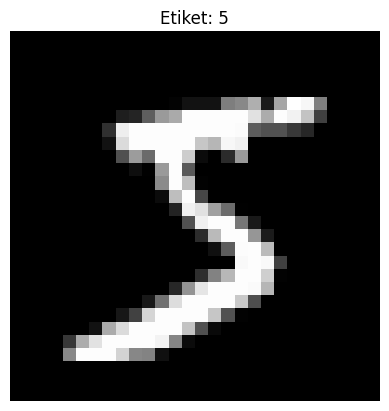

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Veriyi Yükle
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Veriyi İncele
print(f"Eğitim Seti: {X_train.shape}") # (60000, 28, 28)
print(f"Test Seti: {X_test.shape}")

# Rastgele bir örneği çizdirelim
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Etiket: {y_train[0]}")
plt.axis('off')
plt.show()

***Adım 2: Veri Ön İşleme (Preprocessing)***

Sinir ağları 2 boyutlu kare (28x28) resimleri doğrudan anlayamaz (şimdilik). Onları düzleştirmemiz (Flatten) ve 784 elemanlı tek bir vektör haline getirmemiz gerekir. Ayrıca 0-255 arası renk değerlerini 0-1 arasına sıkıştırmalıyız.

In [10]:
# 1. Düzleştirme (Flatten) ve Normalizasyon (Scaling)
# 28x28 = 784 piksel
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

# 2. Etiketleri Kodlama (One-Hot Encoding)
# 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

print("İşlenmiş Veri Boyutu:", X_train.shape)

İşlenmiş Veri Boyutu: (60000, 784)


***Adım 3: Modern Sinir Ağını İnşa Etme***

Burada öğrendiğimiz tüm "Best Practice" teknikleri kullanacağız:

* He Initialization: ReLU için en iyi başlangıç.

* Batch Normalization: Eğitimi hızlandırmak için.

* Dropout: Ezberlemeyi önlemek için.

* Softmax: Olasılık dağılımı için.

In [11]:
model = Sequential()

# --- 1. Gizli Katman ---
model.add(Dense(512, input_shape=(784,), kernel_initializer='he_normal'))
model.add(BatchNormalization()) # Turbo
model.add(Activation('relu'))
model.add(Dropout(0.2)) # %20 unutma

# --- 2. Gizli Katman ---
model.add(Dense(256, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# --- Çıktı Katmanı ---
model.add(Dense(10, activation='softmax')) # 10 Sınıf (0-9)

# Modeli Özetle
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,890 (2.06 MB)

 Trainable params: 537,354 (2.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

***Adım 4: Derleme ve Eğitim***

In [12]:
# Optimizer: Adam (En iyisi)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping: Aşırı öğrenirse durdur
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Eğitimi Başlat
history = model.fit(X_train, y_train,
                    epochs=20, # Early Stop muhtemelen daha önce durduracak
                    batch_size=128,
                    validation_split=0.1, # Eğitim verisinin %10'unu doğrulama için ayır
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8633 - loss: 0.4431 - val_accuracy: 0.9715 - val_loss: 0.0978
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9647 - loss: 0.1149 - val_accuracy: 0.9775 - val_loss: 0.0756
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9747 - loss: 0.0821 - val_accuracy: 0.9823 - val_loss: 0.0614
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9822 - loss: 0.0569 - val_accuracy: 0.9813 - val_loss: 0.0630
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9840 - loss: 0.0499 - val_accuracy: 0.9830 - val_loss: 0.0599
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9864 - loss: 0.0424 - val_accuracy: 0.9828 - val_loss: 0.0653
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9890 - loss: 0.0340 - val_accuracy: 0.9835 - val_loss: 0.0608
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9894 - loss: 0.0323 - val_a

***Adım 5: Sonuçları Görselleştirme ve Test***

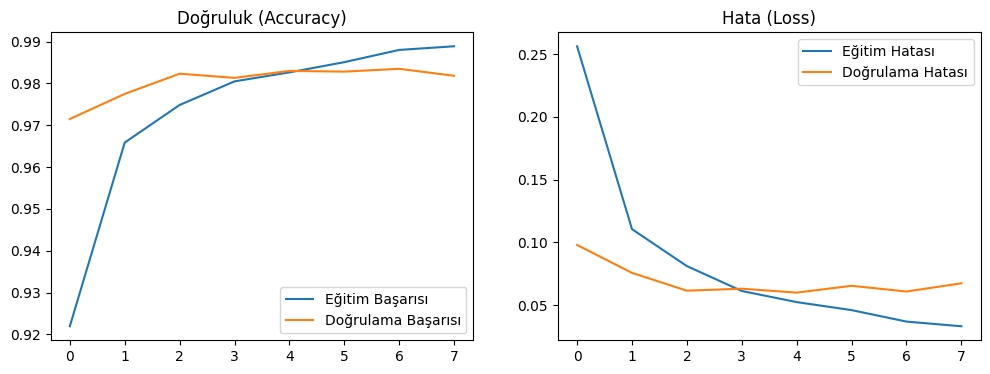


Test Seti Doğruluk Oranı: %97.83
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


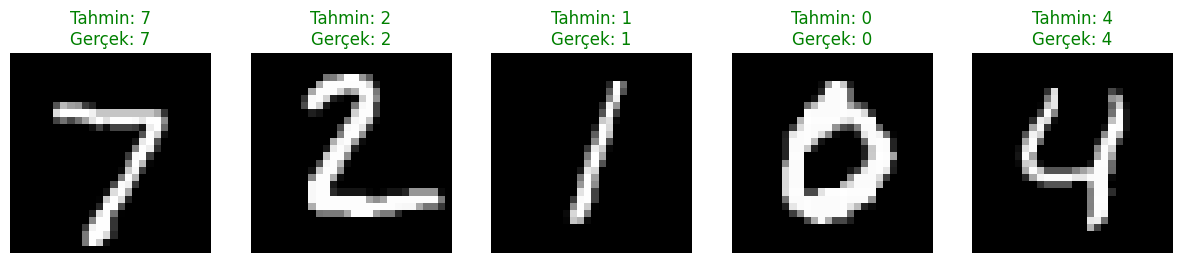

In [13]:
# Eğitim Grafiği
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Başarısı')
plt.plot(history.history['val_accuracy'], label='Doğrulama Başarısı')
plt.title('Doğruluk (Accuracy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Hatası')
plt.plot(history.history['val_loss'], label='Doğrulama Hatası')
plt.title('Hata (Loss)')
plt.legend()
plt.show()

# Test Seti Üzerinde Final Puanı
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Seti Doğruluk Oranı: %{acc*100:.2f}")

# Tahmin Örnekleri Görme
predictions = model.predict(X_test)

# İlk 5 tahmini çizelim
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f"Tahmin: {pred_label}\nGerçek: {true_label}", color=color)
    ax.axis('off')
plt.show()

***Sonuç Yorumu***

Muhtemelen %98.0 ile %98.5 arasında bir doğruluk oranı elde ettiniz. Tebrikler! Sadece sayı dizilerini kullanarak, bir makineye "görmeyi" öğrettiniz.

##Seri Sonu ve Kapanış: Bir Sorun Var...
Bu proje harika çalıştı ama bir hilesi vardı: Rakamlar hep ortalanmış ve düzgündü. Eğer rakam resmin sağ üst köşesinde olsaydı veya ters dönmüş olsaydı, bu ağ (Dense Layer) onu ***tanıyamazdı***.

Çünkü Klasik Sinir Ağları (ANN), pikselleri düz bir çizgiye (784 elemanlı vektör) çevirirken ***mekansal ilişkileri (Spatial Relationships)*** kaybeder. Bir pikselin komşusunun kim olduğunu unutur.

Peki, yüz tanıma sistemleri veya otonom araçlar karmaşık görüntüleri nasıl anlıyor?

Cevap: İnsan gözünü taklit eden, görüntüyü tarayarak özellik çıkaran ***Evrişimli Sinir Ağları (Convolutional Neural Networks - CNN)***.